#  Data preparation

In [1]:
import pandas as pd
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [2]:
data = pd.read_csv('Al_alloys_BD.csv')
data.head()

,Alloy Series type,temper method,Cold Rolling reduction,Component part shape,Processing Method,Initial Temperature (Celcius),Final Temperature (Celcius),Average Temperature (Celcius),Boundary Temperature (Celcius)(+/-),Time at Termperature (h),Precipitation Hardening Aging time (h),Standardized Composition,Dendrite cell size,Al Nominal,Al Minimum,Al Maximum,Si Nominal,Si Minimum,Si Maximum,Fe+Ni Nominal,Fe+Ni Minimum,Fe+Ni Maximum,Fe Nominal,Fe Minimum,Fe Maximum,Si+Fe Nominal,Si+Fe Minimum,Si+Fe Maximum,Si+Cu Nominal,Si+Cu Minimum,Si+Cu Maximum,Cu Nominal,Cu Minimum,Cu Maximum,Cd Nominal,Cd Minimum,Cd Maximum,Mn Nominal,Mn Minimum,Mn Maximum,Si+Mg Nominal,Si+Mg Minimum,Si+Mg Maximum,Mg Nominal,Mg Minimum,Mg Maximum,Mg2Si Nominal,Mg2Si Minimum,Mg2Si Maximum,Cr Nominal,Cr Minimum,Cr Maximum,Zn Nominal,Zn Minimum,Zn Maximum,Bi Nominal,Bi Minimum,Bi Maximum,Ti Nominal,Ti Minimum,Ti Maximum,V Nominal,V Minimum,V Maximum,V+Ti Nominal,V+Ti Minimum,V+Ti Maximum,W Nominal,W Minimum,W Maximum,Zr Nominal,Zr Minimum,Zr Maximum,Pb Nominal,Pb Minimum,Pb Maximum,Ni Nominal,Ni Minimum,Ni Maximum,Sn Nominal,Sn Minimum,Sn Maximum,Sb Nominal,Sb Minimum,Sb Maximum,Ag Nominal,Ag Minimum,Ag Maximum,Be Nominal,Be Minimum,Be Maximum,B Nominal,B Minimum,B Maximum,Li Nominal,Li Minimum,Li Maximum,Ga Nominal,Ga Minimum,Ga Maximum,Density (kg/m3),Average coefficient of thermal expansion (10-6 °C-1),Solidus (Celcius)(°C),Liquidus (Celcius)(°C),Eutectic melting can be completely eliminated by homogenization,Thermal conductivity at 20 °C (W/(m °C)),Thermal conductivity at 25 °C (W/(m °C)),"Electrical conductivity at 20°C, equal volume (%IACS)","Electrical conductivity at 25°C, equal volume (%IACS)","Electrical conductivity at 20°C, equal weight (%IACS)",Electrical resistivity 20 °C(ohm mm2/m),Ultimate tensile strength (MPa),Tensile yield strength at 0.2% offset (MPa),Tensile elongation in 5D (%),Vicker Hardness (MN/m^2),"Brinell hardness at 500 kg load, 10 mm ball",Ultimate shear strength (MPa),Fatigue endurance limit (MPa),Modulus of elasticity (MPa),Tension elongation in 50 mm for 1.6 mm thick specimen (%),Tension elongation in 50 mm for 12.5 mm diameter specimen (4D),fatigue strength in 5 × 108 cycles by R. R Moore test (MPa),Tensile Strength after heating,Yield strength after heating
0,1050,O,NaN,NaN,Wrought,-50,20,-15,35.0,NaN,NaN,Y,NaN,NaN,99.5,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1050,O,NaN,NaN,Wrought,20,100,60,40.0,NaN,NaN,Y,NaN,NaN,99.5,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1050,O,NaN,NaN,Wrought,20,200,110,90.0,NaN,NaN,Y,NaN,NaN,99.5,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1050,O,NaN,NaN,Wrought,20,300,160,140.0,NaN,NaN,Y,NaN,NaN,99.5,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,

In [3]:
data.info(verbose = True, null_counts = False) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 124 columns):
 #    Column                                                           Dtype  
---   ------                                                           -----  
 0    Alloy Series type                                                object 
 1    temper method                                                    object 
 2    Cold Rolling reduction                                           object 
 3    Component part shape                                             object 
 4    Processing Method                                                object 
 5    Initial Temperature (Celcius)                                    object 
 6    Final Temperature (Celcius)                                      object 
 7    Average Temperature (Celcius)                                    object 
 8    Boundary Temperature  (Celcius)(+/-)                             float64
 9    Time at Termperat

C:\Users\razaf\AppData\Local\Temp\ipykernel_11552\2635552784.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose = True, null_counts = False)


# Data exploration

## Cleanning

In [4]:
columns_name = data.columns.to_list()


### Initial-Final-Average Temperature

In [5]:
data['Initial Temperature (Celcius)'].unique()

array(['-50', '20', nan, '-195', '-80', '-28', '24', '100', '149', '204',
       '260', '316', '371', '-196', 'Room temperature', '120', '175',
       '2.70E+01', '5.10E+01', '7.50E+01', '1.01E+02', '1.28E+02',
       '1.52E+02', '1.76E+02', '2.01E+02', '2.31E+02', '2.51E+02',
       '2.61E+02', '5.25E+01', '2.30E+02', '2.60E+02', '-269', '150',
       '205', '230', '315', '370', '425', '480', '535', '-30', '25',
       '-200', '-100', '200', '300', '400', '195', '80', '0', '121',
       '171', '232', '220', '427', '27', '327', '-173', '-73', '127',
       '227', '326', '527', '600', '700', '170', '500', '800', '900'],
      dtype=object)

In [6]:
data['Initial Temperature (Celcius)'].replace('Room temperature', 25, inplace=True)
data['Initial Temperature (Celcius)'] =data['Initial Temperature (Celcius)'].astype('float')
data['Initial Temperature (Celcius)'].unique()

array([ -50. ,   20. ,    nan, -195. ,  -80. ,  -28. ,   24. ,  100. ,
        149. ,  204. ,  260. ,  316. ,  371. , -196. ,   25. ,  120. ,
        175. ,   27. ,   51. ,   75. ,  101. ,  128. ,  152. ,  176. ,
        201. ,  231. ,  251. ,  261. ,   52.5,  230. , -269. ,  150. ,
        205. ,  315. ,  370. ,  425. ,  480. ,  535. ,  -30. , -200. ,
       -100. ,  200. ,  300. ,  400. ,  195. ,   80. ,    0. ,  121. ,
        171. ,  232. ,  220. ,  427. ,  327. , -173. ,  -73. ,  127. ,
        227. ,  326. ,  527. ,  600. ,  700. ,  170. ,  500. ,  800. ,
        900. ])

In [7]:
data['Final Temperature (Celcius)'].replace('Room temperature', 25, inplace=True)
data['Final Temperature (Celcius)'] =data['Final Temperature (Celcius)'].astype('float')

In [8]:
data['Average Temperature (Celcius)'].replace('Room temperature', 25, inplace=True)
data['Average Temperature (Celcius)'] =data['Average Temperature (Celcius)'].astype('float')

In [9]:
data['Time at Termperature (h)'].unique()

array([nan, '10000', '0.1-10000', '100000', '0.1-10', '100', '1000',
       '0.1', '0.5', '10'], dtype=object)

In [10]:
data['Time at Termperature (h)'].replace('0.1-10000',10000, inplace=True)
data['Time at Termperature (h)'].replace('0.1-10',10, inplace=True)
data['Time at Termperature (h)'] =data['Time at Termperature (h)'].astype('float')

### Precipitation Hardening

In [11]:
data['Precipitation Hardening Aging time (h)'].replace('Undetermined',np.nan, inplace=True)
data['Precipitation Hardening Aging time (h)'] =data['Precipitation Hardening Aging time (h)'].astype('float')

###  Nominal-Minimum-Miximum Value

In [12]:
Nominal_col = [name for name in columns_name if 'Nominal' in name ]
Nominal_col.remove('Al Nominal')
Minimum_col = [name for name in columns_name if 'Minimum' in name ]
Minimum_col.remove('Al Minimum')
Maximum_col = [name for name in columns_name if 'Maximum' in name ]
Maximum_col.remove('Al Maximum')
print(len(Nominal_col),len(Minimum_col),len(Maximum_col))

28 28 28


#### Replace nan by 0 

In [13]:
# for name in Nominal_col:
#     data[name]=data[name].fillna(0)
    
for name in Minimum_col:
    data[name]=data[name].fillna(0)

for name in Maximum_col:
    data[name]=data[name].fillna(0)

#### Nominal = Average(Minimal, Maximal)

In [14]:
for name in Nominal_col:
    name1 = ' '.join([name.split()[0],'Maximum'])
    name2 = ' '.join([name.split()[0],'Minimum'])
    list0 = data[name].to_list()
    list1 = data[name1].to_list()
    list2 = data[name2].to_list()
    for index, row in data.iterrows():
            if pd.isnull(row[name]):  
                data.at[index,name] = (list1[index]+list2[index])/2
            elif row[name1]==0.0  and row[name2]==0.0:
                data.at[index,name1] = list0[index]
                data.at[index,name2] = list0[index]
            elif pd.isnull(row[name1]):
                data.at[index,name1] = 0
            elif pd.isnull(row[name2]):
                data.at[index,name2] = 0                  

#### Al Nominal = 100 - Sum (Nominal)

In [15]:
for index, row in data.iterrows():
    if pd.isnull(row['Al Nominal']) or row['Al Nominal']=='balance'or row['Al Nominal']=='Balance' :
        val = 100 - data.loc[:index,Nominal_col].sum(axis=1)
        data.at[index,'Al Nominal'] = val.values[0]

#### Al Minimum = 100 - Sum (Maximum)

In [16]:
for index, row in data.iterrows():
    if pd.isnull(row['Al Maximum']):
        val = 100 - data.loc[:index,Minimum_col].sum(axis=1)
        data.at[index,'Al Maximum'] = val.values[0]

#### Al Maximum= 100 - Sum ( Minimum)

In [17]:
for index, row in data.iterrows():
    if pd.isnull(row['Al Minimum']):
        val = 100 - data.loc[:index,Maximum_col].sum(axis=1)
        data.at[index,'Al Minimum'] = val.values[0]

In [18]:
data.head()

,Alloy Series type,temper method,Cold Rolling reduction,Component part shape,Processing Method,Initial Temperature (Celcius),Final Temperature (Celcius),Average Temperature (Celcius),Boundary Temperature (Celcius)(+/-),Time at Termperature (h),Precipitation Hardening Aging time (h),Standardized Composition,Dendrite cell size,Al Nominal,Al Minimum,Al Maximum,Si Nominal,Si Minimum,Si Maximum,Fe+Ni Nominal,Fe+Ni Minimum,Fe+Ni Maximum,Fe Nominal,Fe Minimum,Fe Maximum,Si+Fe Nominal,Si+Fe Minimum,Si+Fe Maximum,Si+Cu Nominal,Si+Cu Minimum,Si+Cu Maximum,Cu Nominal,Cu Minimum,Cu Maximum,Cd Nominal,Cd Minimum,Cd Maximum,Mn Nominal,Mn Minimum,Mn Maximum,Si+Mg Nominal,Si+Mg Minimum,Si+Mg Maximum,Mg Nominal,Mg Minimum,Mg Maximum,Mg2Si Nominal,Mg2Si Minimum,Mg2Si Maximum,Cr Nominal,Cr Minimum,Cr Maximum,Zn Nominal,Zn Minimum,Zn Maximum,Bi Nominal,Bi Minimum,Bi Maximum,Ti Nominal,Ti Minimum,Ti Maximum,V Nominal,V Minimum,V Maximum,V+Ti Nominal,V+Ti Minimum,V+Ti Maximum,W Nominal,W Minimum,W Maximum,Zr Nominal,Zr Minimum,Zr Maximum,Pb Nominal,Pb Minimum,Pb Maximum,Ni Nominal,Ni Minimum,Ni Maximum,Sn Nominal,Sn Minimum,Sn Maximum,Sb Nominal,Sb Minimum,Sb Maximum,Ag Nominal,Ag Minimum,Ag Maximum,Be Nominal,Be Minimum,Be Maximum,B Nominal,B Minimum,B Maximum,Li Nominal,Li Minimum,Li Maximum,Ga Nominal,Ga Minimum,Ga Maximum,Density (kg/m3),Average coefficient of thermal expansion (10-6 °C-1),Solidus (Celcius)(°C),Liquidus (Celcius)(°C),Eutectic melting can be completely eliminated by homogenization,Thermal conductivity at 20 °C (W/(m °C)),Thermal conductivity at 25 °C (W/(m °C)),"Electrical conductivity at 20°C, equal volume (%IACS)","Electrical conductivity at 25°C, equal volume (%IACS)","Electrical conductivity at 20°C, equal weight (%IACS)",Electrical resistivity 20 °C(ohm mm2/m),Ultimate tensile strength (MPa),Tensile yield strength at 0.2% offset (MPa),Tensile elongation in 5D (%),Vicker Hardness (MN/m^2),"Brinell hardness at 500 kg load, 10 mm ball",Ultimate shear strength (MPa),Fatigue endurance limit (MPa),Modulus of elasticity (MPa),Tension elongation in 50 mm for 1.6 mm thick specimen (%),Tension elongation in 50 mm for 12.5 mm diameter specimen (4D),fatigue strength in 5 × 108 cycles by R. R Moore test (MPa),Tensile Strength after heating,Yield strength after heating
0,1050,O,NaN,NaN,Wrought,-50.0,20.0,-15.0,35.0,NaN,NaN,Y,NaN,99.775,99.5,100.0,0.125,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.05,0.0,0.0,0.0,0.025,0.0,0.05,0.0,0.0,0.0,0.025,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,21.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1050,O,NaN,NaN,Wrought,20.0,100.0,60.0,40.0,NaN,NaN,Y,NaN,99.775,99.5,100.0,0.125,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.05,0.0,0.0,0.0,0.025,0.0,0.05,0.0,0.0,0.0,0.025,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,23.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1050,O,NaN,NaN,Wrought,20.0,200.0,110.0,90.0,NaN,NaN,Y,NaN,99.775,99.5,100.0,0.125,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.05,0.0,0.0,0.0,0.025,0.0,0.05,0.0,0.0,0.0,0.025,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,24.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1050,O,NaN,NaN,Wrought,20.0,300.0,160.0,140.0,NaN,NaN,Y,NaN,99.775,99.5,100.0,0.125,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.

### Standardized Composition

In [19]:
data['Standardized Composition'].unique() 

array(['Y', 'N', nan], dtype=object)

### Density (kg/m3)

In [20]:
data['Density (kg/m3)'].unique()  

array([nan, '2705', '2700', '2710', '2820', '2800', '2770', '2750',
       '2810', '2840', '2760', '2730', '2720', '2690', '2680', '2640',
       '2660', '2650', '2740', '2796', '2824', '1938', '2768', '2823',
       '2658', '2763', '2713', '2703', '2685', '2630', '3770', '2500',
       '2900-3000'], dtype=object)

In [21]:
data['Density (kg/m3)'].replace('2900-3000',2950, inplace=True)
data['Density (kg/m3)'] =data['Density (kg/m3)'].astype('float')

### Eutectic melting can be completely eliminated by homogenization

In [22]:
data['Eutectic melting can be completely eliminated by homogenization'].unique()  

array([nan, 'Y', 'N', 'G'], dtype=object)

### Thermal conductivity at 25 °C (W/(m °C))

In [23]:
data['Thermal conductivity at 25 °C (W/(m °C))'].unique()  

array([nan, '234', '230', '222', '218', '151', '172', '193', '134', '154',
       '121', '159', '152', '112', '147', '163', '138', '180', '200',
       '117', '108', '125', '176', '205', '190', '167', '209', '226',
       '213', '198', '157', '130', '133', '150', '141', '145', '104',
       '140', '166', '162', '160', '158', '113', '94', '135', '96', '103',
       '92', '1.6*10^(-2)', '2 * 10^(-2)', '1.2-1.4 * 10^-2'],
      dtype=object)

In [24]:
data['Thermal conductivity at 25 °C (W/(m °C))'].replace('1.6*10^(-2)',1.6*10**(-2), inplace=True)
data['Thermal conductivity at 25 °C (W/(m °C))'].replace('2 * 10^(-2)',2*10**(-2), inplace=True)
data['Thermal conductivity at 25 °C (W/(m °C))'].replace('1.2-1.4 * 10^-2',1.2*10**(-2), inplace=True)
data['Thermal conductivity at 25 °C (W/(m °C))'] =data['Thermal conductivity at 25 °C (W/(m °C))'].astype('float')

### Ultimate tensile strength  (MPa)

In [25]:
def mean_range(r):
    a = [float(i) for i in r.split('-')]
    return sum(a) / len(a)



In [26]:
for index, row in data.iterrows():
    if '-' in str(data.at[index,'Ultimate tensile strength  (MPa)']):
        data.at[index,'Ultimate tensile strength  (MPa)'] =  mean_range(data.at[index,'Ultimate tensile strength  (MPa)'])
    elif str(data.at[index,'Ultimate tensile strength  (MPa)']).startswith('I'):
        # 'I190'
        val =data.at[index,'Ultimate tensile strength  (MPa)'].replace('I','1')
        data.at[index,'Ultimate tensile strength  (MPa)'] = val
        
data['Ultimate tensile strength  (MPa)'] = data['Ultimate tensile strength  (MPa)'].astype('float')        

### Tensile elongation in 5D (%)

In [27]:
for index, row in data.iterrows():
    if '-' in str(data.at[index,'Tensile elongation in 5D (%)']):
        data.at[index,'Tensile elongation in 5D (%)'] =  mean_range(data.at[index,'Tensile elongation in 5D (%)'])
    elif '<' in str(data.at[index,'Tensile elongation in 5D (%)']):
        val =data.at[index,'Tensile elongation in 5D (%)'].replace('<','')
        data.at[index,'Tensile elongation in 5D (%)'] = val

data['Tensile elongation in 5D (%)'] = data['Tensile elongation in 5D (%)'].astype('float')        

### Vicker Hardness (MN/m^2)

In [28]:
data['Vicker Hardness (MN/m^2)'].unique()  

array([nan, '140', '320', '300', '440', '350', '1100', '1300', '360',
       '800', '487.7', '811', '1012.4', '1155.5', '200', '381.6', '538.9',
       '678.4', '798.6', '943.5', '1061.8', '550', '287.3', '421.4',
       '537.3', '624.1', '683.7', '721.4', '746.4', '769.6', '785.5',
       '450', '1400', '1040', '600', '650', '980', '900', '940', '180',
       '1450', '300-500', '600-900', '700-1100', '500-800', '700-1000',
       '500-700', '750-1000', '300-400', '1000-1200', '1100-1400',
       '700-900', '800-1200', '1000-1400', '900-1300', '1000-1500',
       '800-1100', '950-1300', '800-1000', '900-1200', '650-800',
       '1100-1600', '850-1250', '1100-1500', '600-800', '650-850',
       '1000-1300', '400-500', '450-550', '600-700', '700-800',
       '800-1300', '1000-1600', '750-950', '400-800', '600-1000',
       '250-350', '350-500', '650-900', '500-600', '400-550', '900-1100',
       '1200-1400', '260-300', '350-400', '520-580', '1200-1300',
       '1500-1700', '200-250', '50

In [29]:
for index, row in data.iterrows():
    if '-' in str(data.at[index,'Vicker Hardness (MN/m^2)']):
        data.at[index,'Vicker Hardness (MN/m^2)'] =  mean_range(data.at[index,'Vicker Hardness (MN/m^2)'])
data['Vicker Hardness (MN/m^2)'] = data['Vicker Hardness (MN/m^2)'].astype('float')  

### Brinell hardness at 500 kg load, 10 mm ball

In [30]:
for index, row in data.iterrows():
    if '-' in str(data.at[index,'Brinell hardness at 500 kg load, 10 mm ball']):
        data.at[index,'Brinell hardness at 500 kg load, 10 mm ball'] =  mean_range(data.at[index,'Brinell hardness at 500 kg load, 10 mm ball'])
    elif '(' in str(data.at[index,'Brinell hardness at 500 kg load, 10 mm ball']):
        # '70 (HR15T)'
        val =data.at[index,'Brinell hardness at 500 kg load, 10 mm ball'].split(' ')[0]
        data.at[index,'Brinell hardness at 500 kg load, 10 mm ball'] = val

data['Brinell hardness at 500 kg load, 10 mm ball'] = data['Brinell hardness at 500 kg load, 10 mm ball'].astype('float')

### Thermal conductivity at 25 °C (W/(m °C))

In [31]:
data['Thermal conductivity at 25 °C (W/(m °C))'].unique()  

array([     nan, 2.34e+02, 2.30e+02, 2.22e+02, 2.18e+02, 1.51e+02,
       1.72e+02, 1.93e+02, 1.34e+02, 1.54e+02, 1.21e+02, 1.59e+02,
       1.52e+02, 1.12e+02, 1.47e+02, 1.63e+02, 1.38e+02, 1.80e+02,
       2.00e+02, 1.17e+02, 1.08e+02, 1.25e+02, 1.76e+02, 2.05e+02,
       1.90e+02, 1.67e+02, 2.09e+02, 2.26e+02, 2.13e+02, 1.98e+02,
       1.57e+02, 1.30e+02, 1.33e+02, 1.50e+02, 1.41e+02, 1.45e+02,
       1.04e+02, 1.40e+02, 1.66e+02, 1.62e+02, 1.60e+02, 1.58e+02,
       1.13e+02, 9.40e+01, 1.35e+02, 9.60e+01, 1.03e+02, 9.20e+01,
       1.60e-02, 2.00e-02, 1.20e-02])

In [32]:
data['Thermal conductivity at 25 °C (W/(m °C))'] = data['Thermal conductivity at 25 °C (W/(m °C))'].astype('float')

### Tension elongation in 50 mm for 1.6 mm thick specimen (%)

In [33]:
data['Tension elongation in 50 mm for 1.6 mm thick specimen (%)'].unique()

array([nan, '43', '16', '12', '8', '6', '35', '9', '5', '23 (In 254 mm)',
       '1.5 (In 254 mm)', '20', '18', '24', '8.3', '9.4', '17', '11',
       '10', '30', '4', '7', '3', '22', '0.5', '25', '14', '27', '15',
       '13', '15 (Specimen 6.35 mm thick)', '6 (In 254 mm or 10 in)',
       '19', '21'], dtype=object)

In [34]:
for index, row in data.iterrows():
    if '(' in str(data.at[index,'Tension elongation in 50 mm for 1.6 mm thick specimen (%)']):
        # '70 (HR15T)'
        val =data.at[index,'Tension elongation in 50 mm for 1.6 mm thick specimen (%)'].split(' ')[0]
        data.at[index,'Tension elongation in 50 mm for 1.6 mm thick specimen (%)'] = val

data['Tension elongation in 50 mm for 1.6 mm thick specimen (%)'] = data['Tension elongation in 50 mm for 1.6 mm thick specimen (%)'].astype('float')

### fatigue strength in 5 × 108 cycles by R. R Moore test (MPa)

In [35]:
data['fatigue strength in 5 × 108 cycles by R. R Moore test (MPa)'].unique()

array([nan, '21', '28', '34', '45', '41', '48', '62', '125', '90', '140',
       '125 (In 107 cycles using flexural-type testing of sheet specimens)',
       '124',
       '220 (In 107 cycles; axially loaded specimens tested at R = 0.1)',
       '103', '105', '55', '69', '97', '110', '83', '115', '130', '150',
       '160', '145',
       '295 (In 107 cycles; axially loaded specimens tested at R = 0.1)',
       '240 (In 107 cycles; axially loaded specimens tested at R = 0.1)',
       '220'], dtype=object)

In [36]:
for index, row in data.iterrows():
    if '(' in str(data.at[index,'fatigue strength in 5 × 108 cycles by R. R Moore test (MPa)']):
        # '70 (HR15T)'
        val =data.at[index,'fatigue strength in 5 × 108 cycles by R. R Moore test (MPa)'].split(' ')[0]
        data.at[index,'fatigue strength in 5 × 108 cycles by R. R Moore test (MPa)'] = val

data['fatigue strength in 5 × 108 cycles by R. R Moore test (MPa)'] = data['fatigue strength in 5 × 108 cycles by R. R Moore test (MPa)'].astype('float')

### Yield strength after heating

In [37]:
data['Yield strength after heating'].unique()

array([nan, '450', '440', '435', '405', '420', '400', '305', '370', '165',
       '425', '360', '275', '170', '90', '295', 'I70', 'I10', '83', '230',
       '130', 'I05', '76', 'I30'], dtype=object)

In [38]:
for index, row in data.iterrows():
    if str(data.at[index,'Yield strength after heating']).startswith('I'):
        # 'I190'
        val =data.at[index,'Yield strength after heating'].replace('I','1')
        data.at[index,'Yield strength after heating'] = val
        
data['Yield strength after heating'] = data['Yield strength after heating'].astype('float') 

### Electrical conductivity at 25°C, equal volume (%IACS)

In [39]:
data['Electrical conductivity at 25°C, equal volume (%IACS)'].unique()

array([nan, '27 - 32', '32 - 34', '29', '30', '25', '23', '33', '38',
       '34', '35', '37', '27', '28', '26', '32', '43', '36', '42', '39',
       '40', '41'], dtype=object)

In [40]:
for index, row in data.iterrows():
    if '-' in str(data.at[index,'Electrical conductivity at 25°C, equal volume (%IACS)']):
        data.at[index,'Electrical conductivity at 25°C, equal volume (%IACS)'] =  mean_range(data.at[index,'Electrical conductivity at 25°C, equal volume (%IACS)'])
data['Electrical conductivity at 25°C, equal volume (%IACS)'] = data['Electrical conductivity at 25°C, equal volume (%IACS)'].astype('float')  

### Eutectic melting can be completely eliminated by homogenization

In [41]:
data['Eutectic melting can be completely eliminated by homogenization'].unique()

array([nan, 'Y', 'N', 'G'], dtype=object)

### Electrical resistivity 20 °C(ohm mm2/m)

In [42]:
import re

In [43]:
data['Electrical resistivity 20 °C(ohm mm2/m)'].unique()

array([nan, '0.028', '0.03', '0.0283', '0.0287', '0.0267', '0.045',
       '0.038', '0.035', '0.0515', '0.043', '0.058', '0.0332', '0.0415',
       '0.0345', '0.04', '0.0615', '0.0465', '0.05', '0.033', '0.06',
       '0.063', '0.055', '0.053', '0.0315', '0.0365', '0.032',
       '2.75 * 10^(-8)', '2.9 * 10^(-8)', '4.7 * 10^(-8)',
       '4.86 * 10^(-8)', '6.25 * 10^(-8)'], dtype=object)

In [44]:
for index, row in data.iterrows():
    if '*' in str(data.at[index,'Electrical resistivity 20 °C(ohm mm2/m)']):
        val =data.at[index,'Electrical resistivity 20 °C(ohm mm2/m)'].replace(' ','')
        a = re.search(r'\((.*?)\)',val).group(1)
        b =  val.split('*')[0] 
        data.at[index,'Electrical resistivity 20 °C(ohm mm2/m)'] =  float('E'.join([b,a]))
data['Electrical resistivity 20 °C(ohm mm2/m)'] = data['Electrical resistivity 20 °C(ohm mm2/m)'].astype('float')  

### Fatigue endurance limit (MPa)

In [45]:
data['Fatigue endurance limit (MPa)'].unique()

array([nan, '20', '30', '35', '45', '40', '50', '60', '125', '90', '140',
       '115', '95', '105', '55', '70', '110', '85', '130', '150', '160',
       '145', '75', '65', '124', '40-60'], dtype=object)

In [46]:
for index, row in data.iterrows():
    if '-' in str(data.at[index,'Fatigue endurance limit (MPa)']):
        data.at[index,'Fatigue endurance limit (MPa)'] =  mean_range(data.at[index,'Fatigue endurance limit (MPa)'])
data['Fatigue endurance limit (MPa)'] = data['Fatigue endurance limit (MPa)'].astype('float')  

### Tensile Strength after heating

In [47]:
data['Tensile Strength after heating'].unique()

array([nan, '485', '475', '460', '470', '455', '405', '435', '395', '290',
       '425', '370', '215', '385', '235', '195', '340', '270', '240',
       'I85', '275', '255', '205'], dtype=object)

In [48]:
for index, row in data.iterrows():
    if str(data.at[index,'Tensile Strength after heating']).startswith('I'):
        # 'I190'
        val =data.at[index,'Tensile Strength after heating'].replace('I','1')
        data.at[index,'Tensile Strength after heating'] = val
        
data['Tensile Strength after heating'] = data['Tensile Strength after heating'].astype('float') 

### Cold Rolling reduction

In [49]:
for index, row in data.iterrows():
    if '%' in str(data.at[index,'Cold Rolling reduction']):
        # '70 (HR15T)'
        val =data.at[index,'Cold Rolling reduction'].split(('%'))[0]
        data.at[index,'Cold Rolling reduction'] = val

data['Cold Rolling reduction'] = data['Cold Rolling reduction'].astype('float')
data = data.rename(columns={'Cold Rolling reduction':'Cold Rolling reduction (%)'})       

###  temper method

In [50]:
for index, row in data.iterrows():
    if '(' in str(data.at[index,'temper method']):
        # '70 (HR15T)'
        val =data.at[index,'temper method'].split(' ')[0]
        data.at[index,'temper method'] = val

### Tensile yield strength at 0.2% offset  (MPa)

In [51]:
data['Tensile yield strength at 0.2% offset  (MPa)'].unique()

array([nan, '28', '105', '125', '145', '76', '90', '34', '69.09', '74.53',
       '109', '139.9', '174.4', '41', '38', '32', '29', '24', '18', '14',
       '11', '115', '140', '83', '52', '150', '180', '160', '130', '97',
       '10', '57', '75', '91', '113', '110', '165', '295', '296', '234',
       '131', '26', '12', '310',
       '290 (Die forgings are about 20% lower in yield strength)', '415',
       '496', '448', '427', '414', '393', '241', '70', '275', '365',
       '290', '283', '270', '207', '35', '345', '359', '352', '331',
       '138', '62', '325', '141.5', '160.1', '180.3', '212.3', '242.6',
       '262.9', '267.9', '274.7', '278', '279.7', '276.4', '284.8',
       '283.1', '281.4', '288.2', '286.5', '421', '338', '324', '248',
       '395', '195', '469', '407', '400', '372', '538', '476', '586',
       '531', '510', '490', '462', '117', '416', '3.63E+02', '3.58E+02',
       '3.53E+02', '3.28E+02', '2.94E+02', '2.55E+02', '2.16E+02',
       '1.67E+02', '1.13E+02', '6.37E+0

In [52]:
for index, row in data.iterrows():
    if '-' in str(data.at[index,'Tensile yield strength at 0.2% offset  (MPa)']):
        data.at[index,'Tensile yield strength at 0.2% offset  (MPa)'] =  mean_range(data.at[index,'Tensile yield strength at 0.2% offset  (MPa)'])
    elif '(' in str(data.at[index,'Tensile yield strength at 0.2% offset  (MPa)']):
        # '70 (HR15T)'
        val =data.at[index,'Tensile yield strength at 0.2% offset  (MPa)'].split(' ')[0]
        data.at[index,'Tensile yield strength at 0.2% offset  (MPa)'] = val
    elif str(data.at[index,'Tensile yield strength at 0.2% offset  (MPa)']).startswith('I'):
        # 'I190'
        val =data.at[index,'Tensile yield strength at 0.2% offset  (MPa)'].replace('I','1')
        data.at[index,'Tensile yield strength at 0.2% offset  (MPa)'] = val

data['Tensile yield strength at 0.2% offset  (MPa)'] = data['Tensile yield strength at 0.2% offset  (MPa)'].astype('float')

## Write data cleaned to csv

In [53]:
data.to_csv('AlAlloysBD_preprocessed.csv', index=False)

## Categorical Data

In [54]:
data = pd.read_csv('AlAlloysBD_preprocessed.csv')

In [55]:
categorical_cols_name = data.select_dtypes(exclude=np.number).columns.tolist()
data_categorical = data.select_dtypes(exclude=np.number)

### Missing data 

<Axes: >

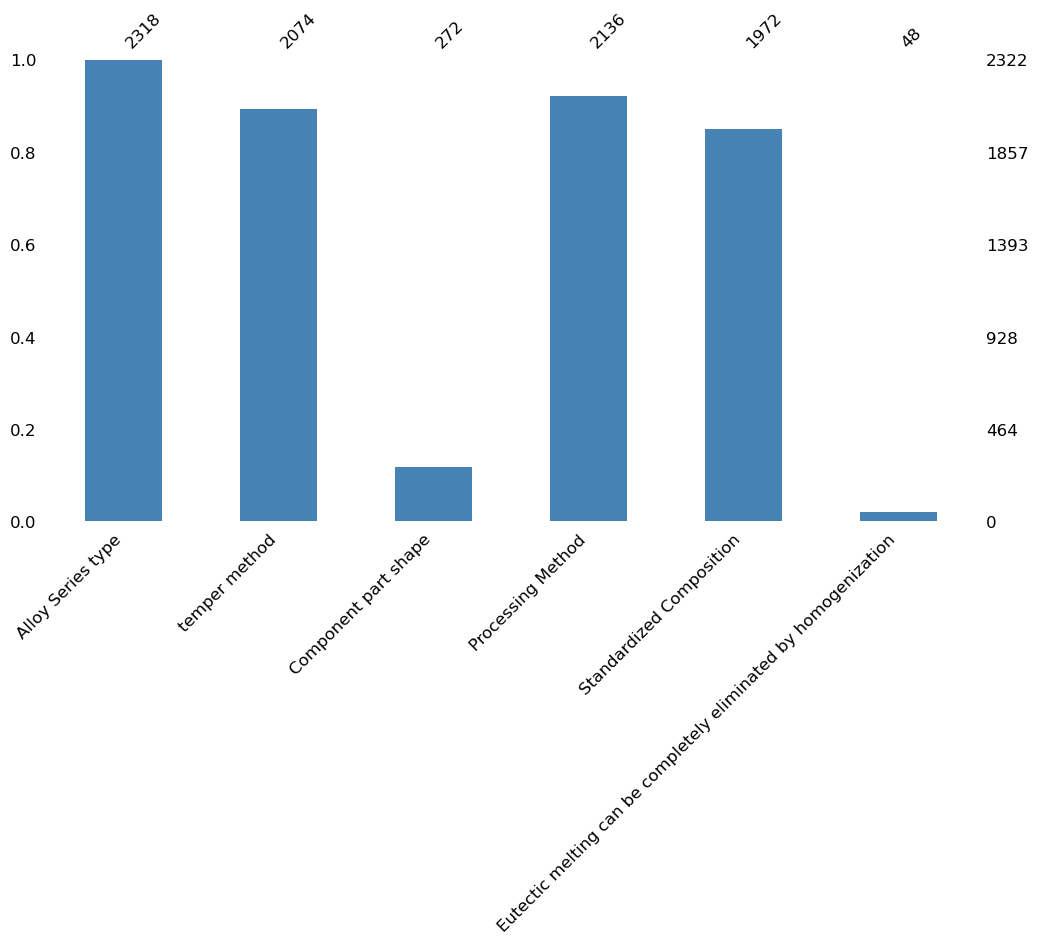

In [56]:
msno.bar(data_categorical, figsize=(12, 6), fontsize=12, color='steelblue')

### Alloy Series type

<Axes: xlabel='count', ylabel='Alloy Series type'>

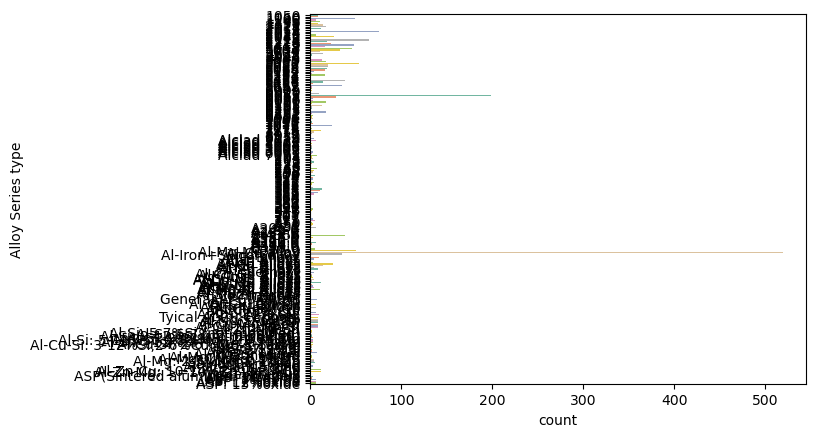

In [57]:
sns.countplot(data = data_categorical, y = 'Alloy Series type', palette='Set2')

### temper method

In [58]:
df1 = data_categorical['temper method'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percentage').reset_index().sort_values('percentage',ascending=False)
df1 = df1.rename(columns={'index': 'temper method'})
df1.head()

,temper method,percentage
0,O,36.403086
1,T4,13.355834
2,T6,11.620058
3,C,4.676953
4,T851,3.953713


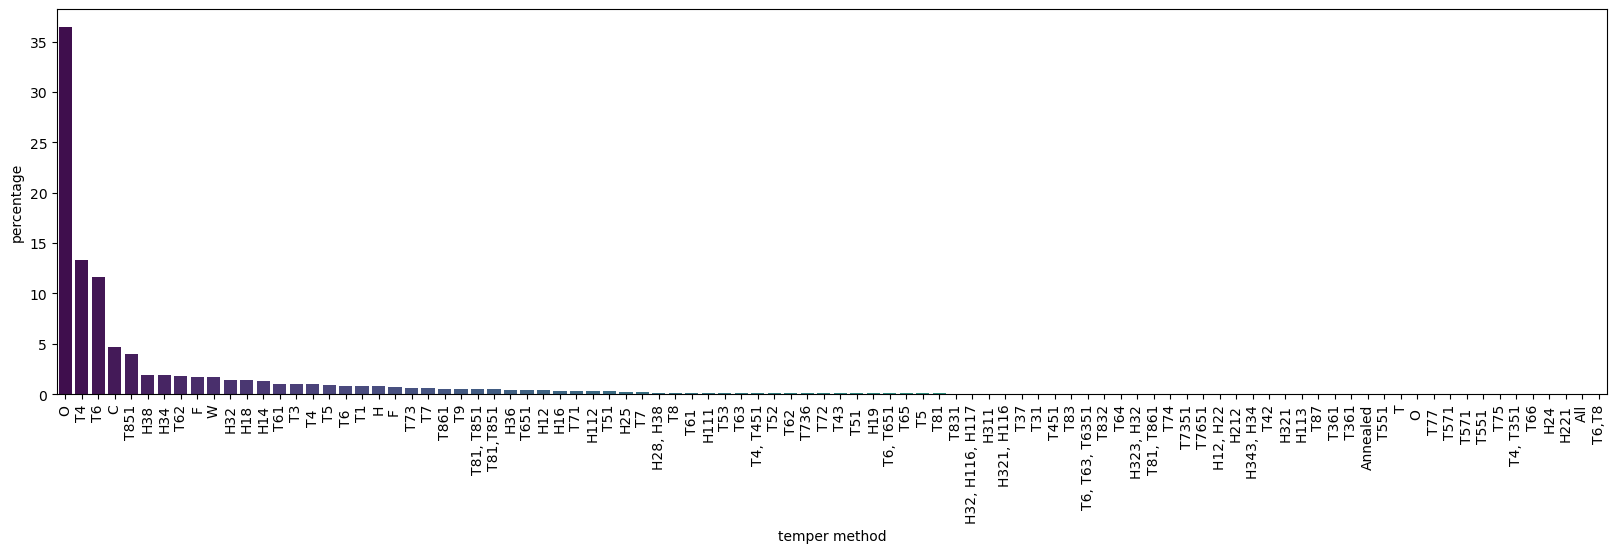

In [59]:
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.barplot(x="temper method", y="percentage",  data=df1, palette="viridis")
_ = plt.setp(ax.get_xticklabels(), rotation=90)  # Rotate labels

In [60]:
# fig, ax = plt.subplots(figsize=(20,15))
# ax=sns.countplot(data = data_categorical, y = 'temper method', palette='Set2',
#                 order = data_categorical['temper method'].value_counts().index)


### Component part shape

In [61]:
# x,y = 'class', 'survived'

# df1 = df.groupby(x)[y].value_counts(normalize=True)
# df1 = df1.mul(100)
# df1 = df1.rename('percent').reset_index()

# g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
# g.ax.set_ylim(0,100)

# for p in g.ax.patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() 
#     txt_y = p.get_height()
#     g.ax.text(txt_x,txt_y,txt)

In [62]:
df1 = data_categorical['Component part shape'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
df1 = df1.rename(columns={'index': 'Component part shape'})
df1.head()

,Component part shape,percent
0,13mm wide and 1.59mm thick,51.102941
1,70mm plate,21.323529
2,13mm thick plate,18.382353
3,sheet,3.676471
4,plate,3.676471


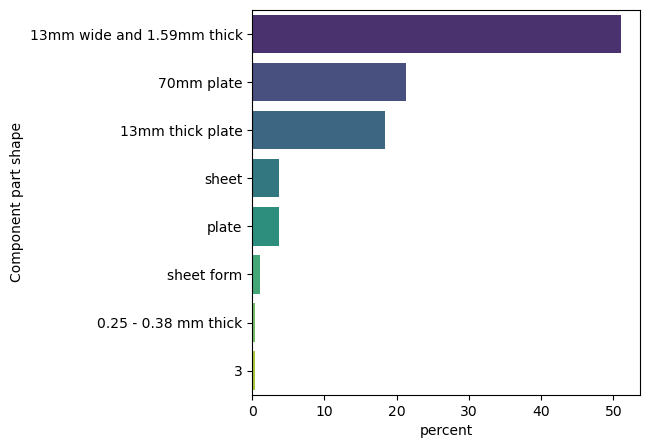

In [63]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.barplot(y='Component part shape', x="percent",  data=df1, palette="viridis")


In [64]:
# fig, ax = plt.subplots(figsize=(8,8))
# ax=sns.countplot(data = data_categorical, y = 'Component part shape', palette='Set2',
#                  order = data_categorical['Component part shape'].value_counts().index)

### Standardized Composition

In [65]:
data_categorical['Standardized Composition'].unique()

array(['Y', 'N', nan], dtype=object)

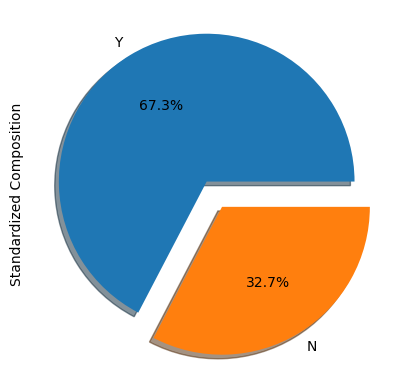

In [66]:
data_categorical['Standardized Composition'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,)
plt.show()

### Eutectic melting can be completely eliminated by homogenization

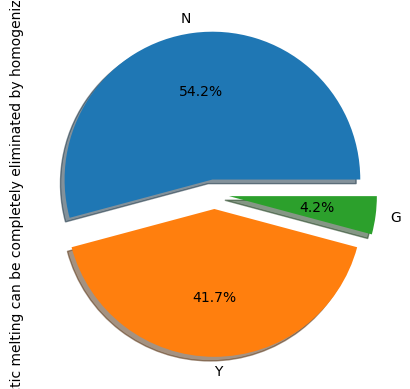

In [67]:
data_categorical['Eutectic melting can be completely eliminated by homogenization'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,)
plt.show()

### Impute categorical values
- Convert non-missing categorical columns to ordinal values 
- Impute the missing  values in the ordinal DataFrame 
- Convert back from ordinal values to categorical values

In [68]:
CAT = data_categorical.loc[:,data_categorical.isnull().mean()<.8]

In [69]:
from sklearn.preprocessing import OrdinalEncoder
CAT_ordinal = CAT.copy(deep=True)
# Create dictionary for Ordinal encoders
ordinal_enc_dict = {}
  # Loop over columns to encode
for col_name in CAT:
  # Create ordinal encoder for the column 
  ordinal_enc_dict[col_name] = OrdinalEncoder()

  # Select the nin-null values in the column
  col = CAT[col_name]
  col_not_null = col[col.notnull()]
  reshaped_vals = col_not_null.values.reshape(-1, 1)

  # Encode the non-null values of the column
  encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
  
  ##Replace the column with ordinal values

  CAT_ordinal.loc[col.notnull(),col_name]  =np.squeeze(encoded_vals)
  print('+Encode: {} '.format(col_name))

+Encode: Alloy Series type 
+Encode: temper method 
+Encode: Processing Method 
+Encode: Standardized Composition 


In [70]:
from sklearn.impute import KNNImputer
KNN_imputer = KNNImputer(n_neighbors=3)
import warnings
warnings.filterwarnings('ignore')
CAT_KNN = CAT_ordinal.copy(deep=True) # Create MICE imputer
CAT_KNN.iloc[:, :] = np.round(KNN_imputer.fit_transform(CAT_KNN))

In [71]:
for col in CAT_KNN:
  reshaped_col = CAT_KNN[col].values.reshape(-1, 1)
  print('inverse_transform: {}'.format(col))
  CAT_KNN[col] = ordinal_enc_dict[col].inverse_transform(reshaped_col)

inverse_transform: Alloy Series type
inverse_transform: temper method
inverse_transform: Processing Method
inverse_transform: Standardized Composition


<Axes: >

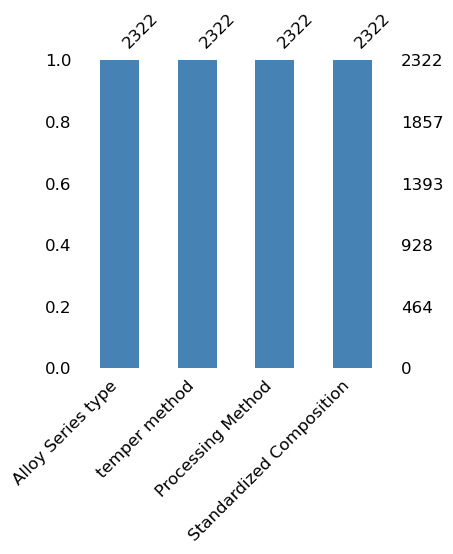

In [72]:
msno.bar(CAT_KNN, figsize=(4,4), fontsize=12, color='steelblue')

In [73]:
CAT_KNN.to_csv('CAT_Inputed_KNN.csv', index=False)

## Numerical Data

### Missing Value

In [74]:
numerics_cols_name = data.select_dtypes(include=np.number).columns.tolist()
data_numerics = data.select_dtypes(include=np.number)

In [75]:
len(numerics_cols_name)

118

In [76]:
to_drop = [name for name in columns_name if ('Nominal'  in name) or  ('Maximum'  in name) or ('Minimum' in name)]


In [77]:
NUM = data_numerics.drop(columns=to_drop)

In [78]:
# data_num1 = data_numerics.iloc[:,:40]
# data_num2 = data_numerics.iloc[:,40:80]
# data_num3 = data_numerics.iloc[:,80:]

In [79]:
# msno.bar(data_num1)

In [80]:
# msno.bar(data_num2)

In [81]:
# msno.bar(data_num3)

<Axes: >

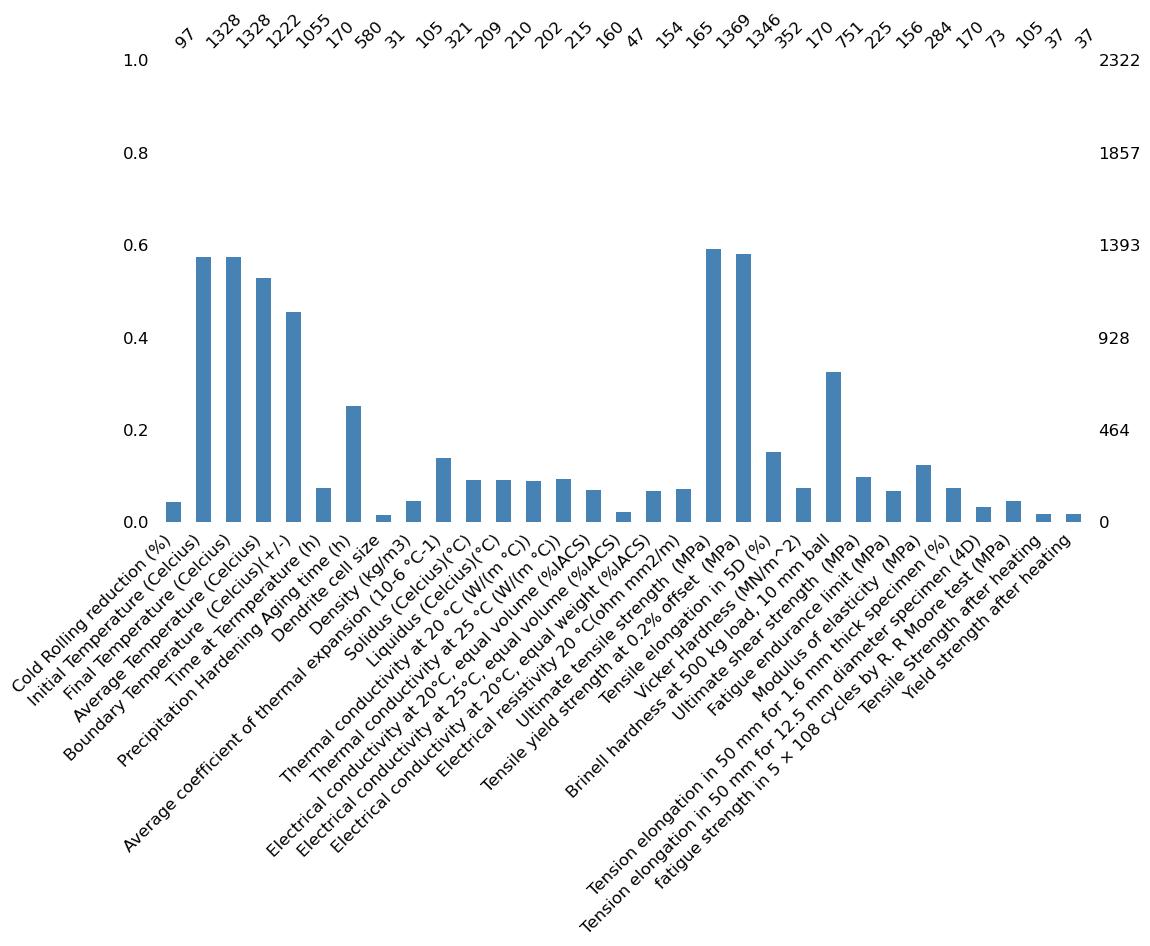

In [82]:
msno.bar(NUM, figsize=(12,6), fontsize=12, color='steelblue')

In [83]:
def get_percentage_missing(series):
    """ Calculates percentage of NaN values in DataFrame
    :param series: Pandas DataFrame object
    :return: float
    """
    num = series.isnull().sum()
    den = len(series)
    return round(num/den, 3)

In [84]:
X = data_numerics
# Only include columns that contain any NaN values
X_with_any_null_values = X[X.columns[X.isnull().any()].tolist()]

percent_missing=get_percentage_missing(X_with_any_null_values)

percent_missing=percent_missing.sort_values(ascending = False)
# Show qty of each value in a Column 
# df.astype(str).groupby(['col1']).sum()
pd.DataFrame({'column_name': X_with_any_null_values.columns,'percent_missing': percent_missing}).head()

#train_missing.sort_values('percent_missing', inplace=True)


,column_name,percent_missing
Dendrite cell size,Cold Rolling reduction (%),0.987
Yield strength after heating,Initial Temperature (Celcius),0.984
Tensile Strength after heating,Final Temperature (Celcius),0.984
"Electrical conductivity at 25°C, equal volume (%IACS)",Average Temperature (Celcius),0.980
Tension elongation in 50 mm for 12.5 mm diameter specimen (4D),Boundary Temperature (Celcius)(+/-),0.969


In [85]:
per = 0.40
train_missing = percent_missing.index[percent_missing > per]
print('There are %d columns with more than %d%% missing values' % (len(train_missing),per*100))


There are 31 columns with more than 40% missing values


In [86]:
# X = X.drop(columns = train_missing)

### drop rows with missing values

In [87]:
data_numerics_dropna = data_numerics.copy(deep=True)
data_numerics_dropna.dropna(inplace=True)
print(data_numerics_dropna.shape)

(0, 118)


### Impute missing Value

In [88]:
NUM1 = NUM.loc[:,NUM.isnull().mean()<.8]

In [89]:
NUM1.columns.tolist()

['Initial Temperature (Celcius)',
 'Final Temperature (Celcius)',
 'Average Temperature (Celcius)',
 'Boundary Temperature  (Celcius)(+/-)',
 'Precipitation Hardening Aging time (h)',
 'Ultimate tensile strength  (MPa)',
 'Tensile yield strength at 0.2% offset  (MPa)',
 'Brinell hardness at 500 kg load, 10 mm ball']

In [90]:
NUM2 = data_numerics.loc[:,data_numerics.isnull().mean()<.8]
print(NUM2.shape)

(2322, 95)


In [91]:
# import fancyimpute
# from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, IterativeImputer

In [92]:
# # Use 3 nearest rows which have a feature to fill in each row's missing features
# X_filled_knn = KNN(k=3).complete(X_incomplete)


In [93]:
# from fancyimpute import MICE

# trans = MICE()
# trans.complete

In [94]:
# from fancyimpute import IterativeImputer
# MICE_imputer = IterativeImputer()
# NUM_MICE = NUM.copy(deep=True)
# NUM_MICE.iloc[:, :] = MICE_imputer.fit_transform(NUM_MICE)

- **correlation matrix**

<Axes: >

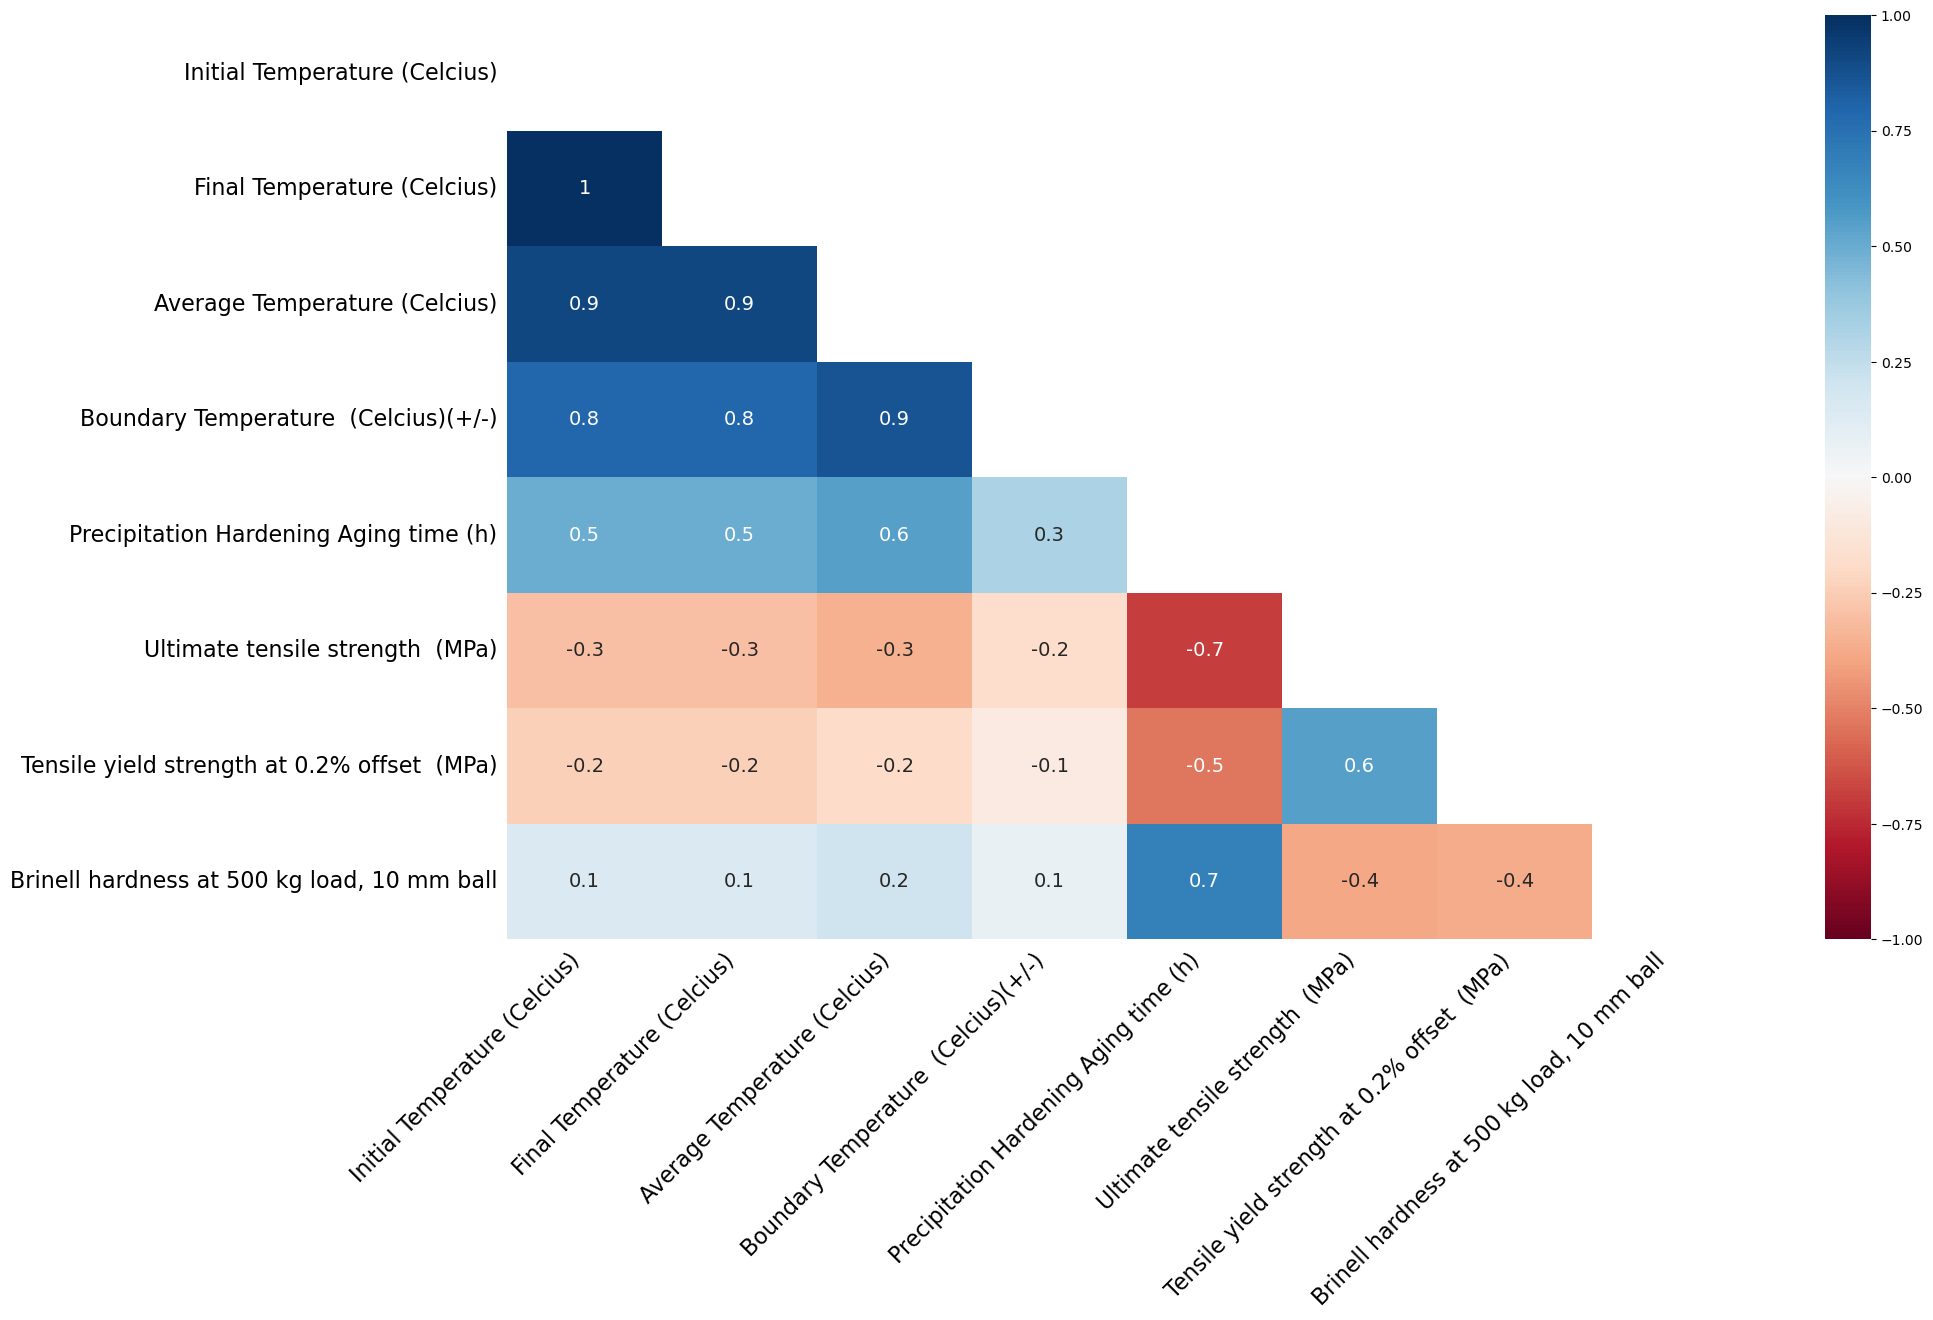

In [95]:
msno.heatmap(NUM1) 

In [96]:
from sklearn.impute import KNNImputer
KNN_imputer = KNNImputer(n_neighbors=3)
import warnings
warnings.filterwarnings('ignore')
NUM_KNN = NUM2.copy(deep=True)
print(NUM_KNN.shape)
NUM_KNN.iloc[:, :] = np.round(KNN_imputer.fit_transform(NUM_KNN))

(2322, 95)


In [97]:
NUM1_KNN = NUM_KNN[NUM1.columns.tolist()]

<Axes: >

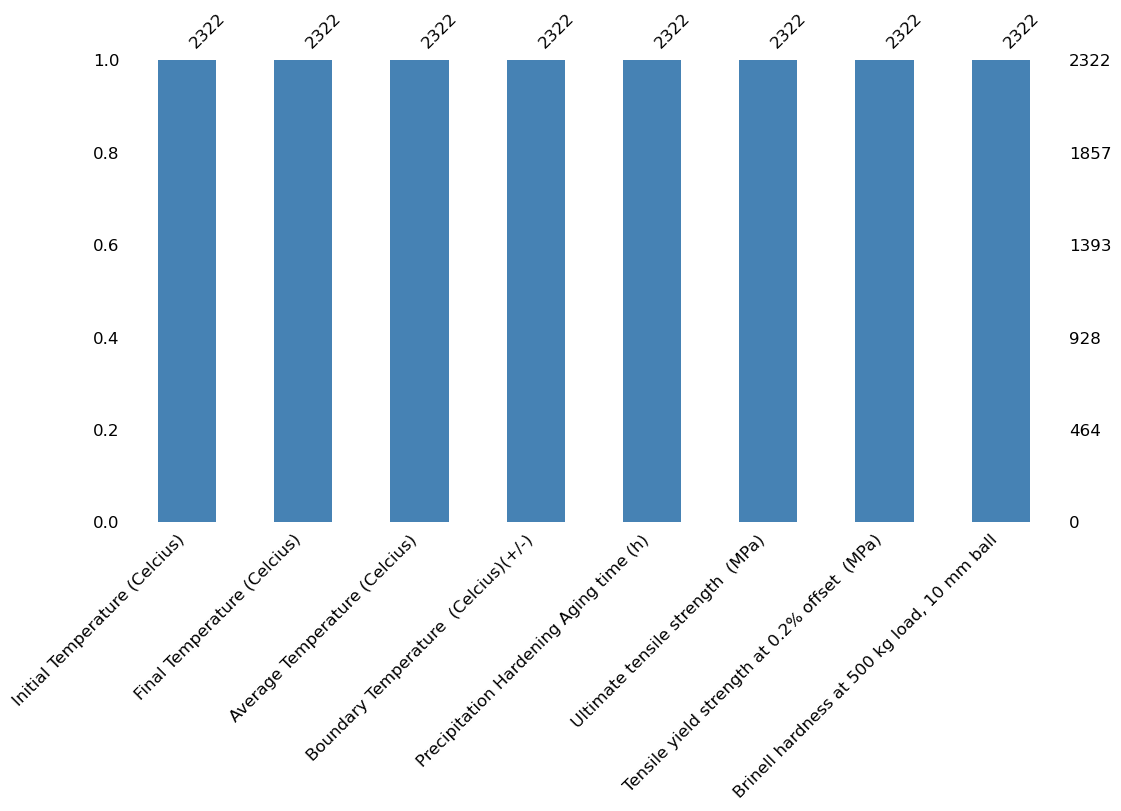

In [98]:
msno.bar(NUM1_KNN, figsize=(12,6), fontsize=12, color='steelblue')

In [99]:
NUM_KNN.to_csv('NUM_Inputed_KNN.csv', index=False)

## data imputed

In [100]:
df_imputed=pd.concat([NUM_KNN, CAT_KNN], axis=1)

<Axes: >

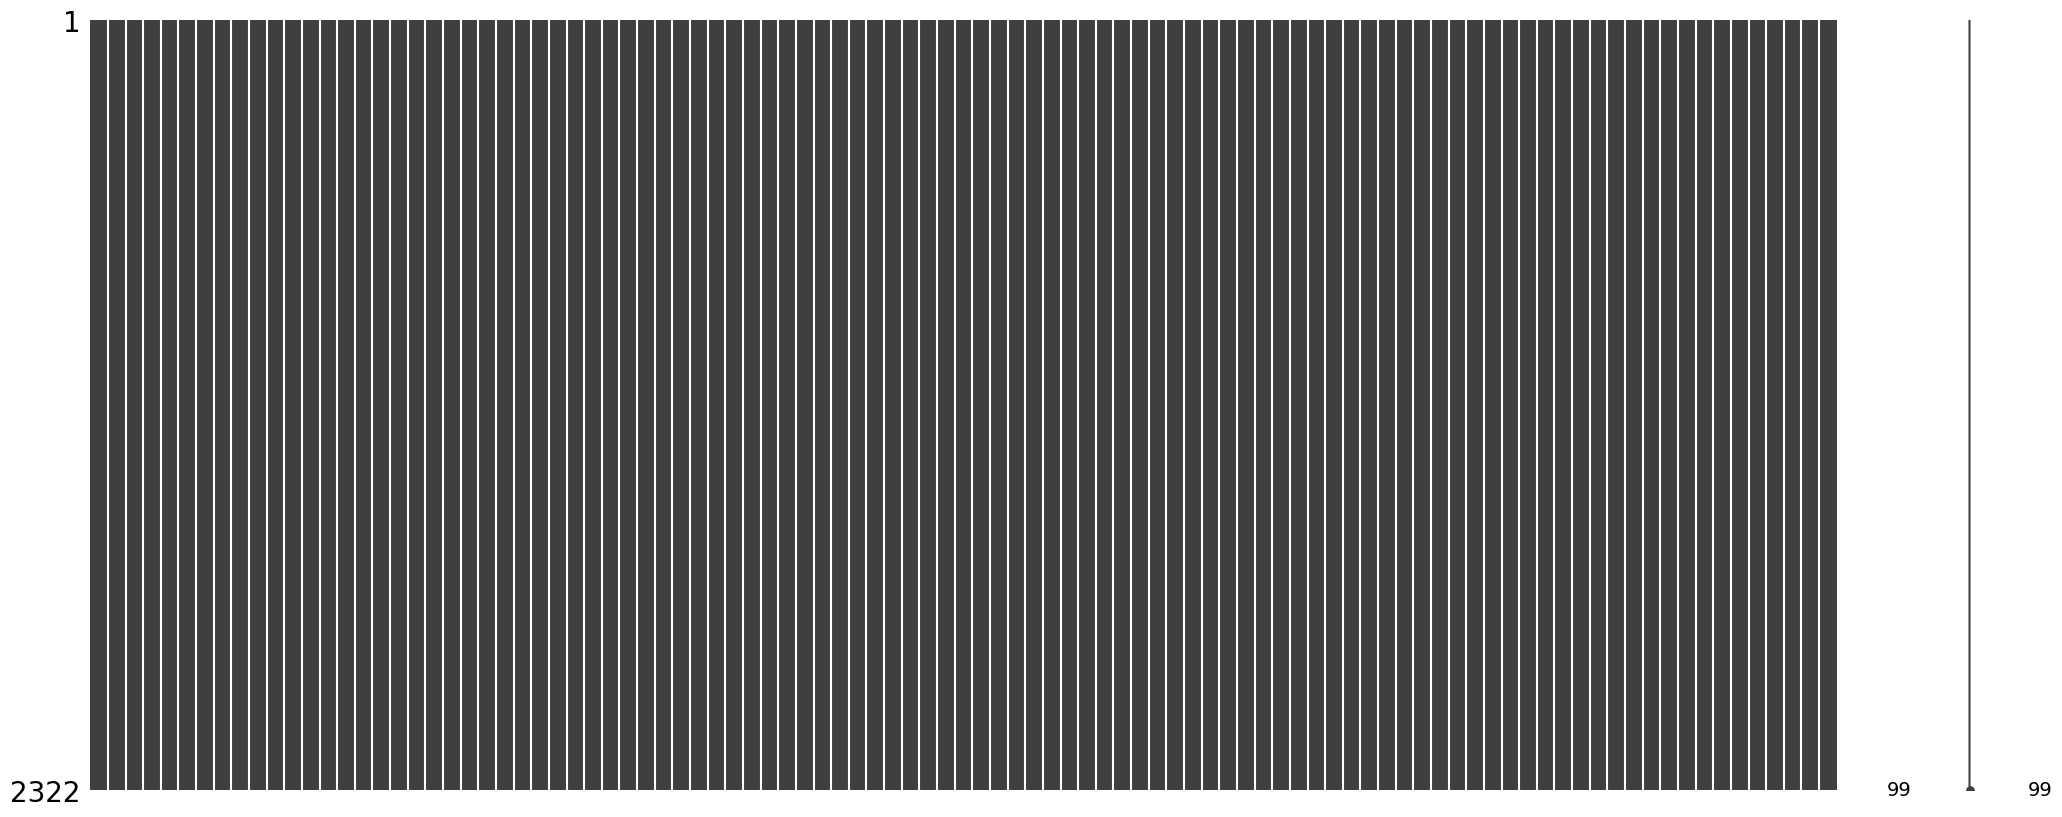

In [101]:
msno.matrix(df_imputed)

In [102]:
df_imputed.to_csv('data_imputed.csv', index=False)